## Importing modules



In [2]:

import pandas as pd 
import matplotlib as plt
import numpy as np 

## Importing data

In [3]:
purchase_behaviour=pd.read_csv("QVI_purchase_behaviour.csv")
transection_data=pd.read_excel("QVI_transaction_data.xlsx")

# Analysing Data

## Let's see if the higher sales are due to there being more customers who buy chips.

## Exploratory data analysis

### Examining transaction data

In [22]:
transection_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [23]:
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [24]:
transection_data.describe()
transection_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [26]:
purchase_behaviour.info()
purchase_behaviour.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


#### Convert DATE column to a date format
#### A quick search online tells us that CSV and Excel integer dates begin on 30 Dec 1899

In [28]:
#turning to date
transection_data['DATE'] = pd.to_datetime(transection_data['DATE'], unit='d',origin=pd.Timestamp('1899-12-30'))

In [29]:
#Testing
transection_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


#### Examine PROD_NAME


In [31]:
transection_data.PROD_NAME.describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

#### Examine the words in PROD_NAME to see if there are any incorrect entries
#### such as products that are not chips


<AxesSubplot:>

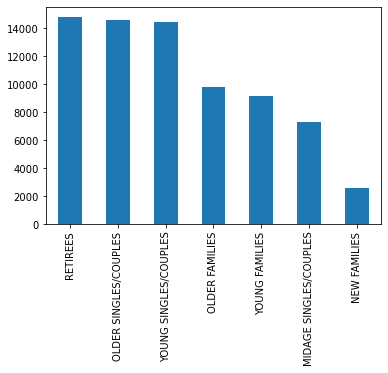

In [27]:
purchase_behaviour["LIFESTAGE"].value_counts().plot.bar()

<AxesSubplot:>

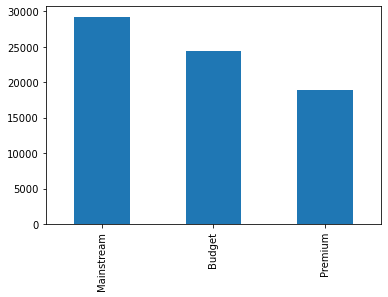

In [19]:
purchase_behaviour["PREMIUM_CUSTOMER"].value_counts().plot.bar()

In [20]:
from matplotlib.pyplot import figure
figure(figsize=(16, 8), dpi=90)

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='PREMIUM_CUSTOMER'>

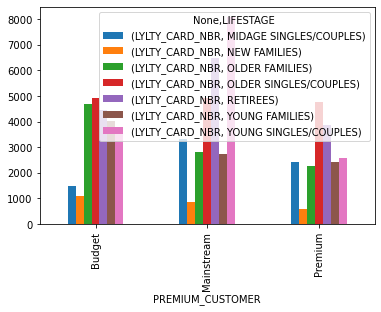

In [21]:

purchase_behaviour.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).count().unstack(0).plot.bar()

## There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment. Higher sales may also be driven by more units of chips being bought per customer. Let's have a look at this next.